### ANLY 590 Assignment 3
Luwei Lei

ll1038

### 1. Autoencoder

Build and fit a convolutional autoencoder for the CIFAR10 dataset.
The components of this network will be many of the same pieces we’ve used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will uti- lize UpSampling2D to get the representation back to the original image size.


In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow.keras as tfk

from keras.utils import to_categorical
from keras.datasets import cifar10
from keras.layers import Input, Dense, Flatten, Dropout, Conv2D, MaxPooling2D, LeakyReLU, LSTM, UpSampling2D
from keras.models import Model, Sequential



In [8]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print("Shape of training data X is ", x_train.shape)
print("Shape of training data y is ", y_train.shape)

print("Shape of testing data X is ", x_test.shape)
print("Shape of testing data y is ", y_test.shape)

Shape of training data X is  (50000, 32, 32, 3)
Shape of training data y is  (50000, 1)
Shape of testing data X is  (10000, 32, 32, 3)
Shape of testing data y is  (10000, 1)


In [19]:
#input shape
input_img = Input(shape=(32, 32, 3)) 

x = Conv2D(filters=32, kernel_size=(3,3),padding="same", activation='relu')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)


x = Conv2D(8, kernel_size =  (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, kernel_size = (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, kernel_size = (3, 3), activation='relu',padding='same')(x)
x = UpSampling2D((2, 2))(x)

decoded = Conv2D(3, kernel_size = (3, 3), activation='relu', padding='same')(x)


autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', metrics=['accuracy'], loss='mean_squared_error')

autoencoder.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 16, 16, 8)         2312      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 8, 8, 8)           0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 8, 8, 8)           584       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 4, 4, 8)         

In [20]:
result_auto = autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
391/391 [==============================] - 73s 187ms/step - loss: 0.0343 - accuracy: 0.4125 - val_loss: 0.0209 - val_accuracy: 0.4331
Epoch 2/20
391/391 [==============================] - 59s 150ms/step - loss: 0.0182 - accuracy: 0.5491 - val_loss: 0.0167 - val_accuracy: 0.5905
Epoch 3/20
391/391 [==============================] - 56s 142ms/step - loss: 0.0159 - accuracy: 0.6099 - val_loss: 0.0153 - val_accuracy: 0.6132
Epoch 4/20
391/391 [==============================] - 58s 149ms/step - loss: 0.0149 - accuracy: 0.6276 - val_loss: 0.0145 - val_accuracy: 0.6346
Epoch 5/20
391/391 [==============================] - 53s 135ms/step - loss: 0.0142 - accuracy: 0.6534 - val_loss: 0.0138 - val_accuracy: 0.6742
Epoch 6/20
391/391 [==============================] - 54s 138ms/step - loss: 0.0137 - accuracy: 0.6697 - val_loss: 0.0134 - val_accuracy: 0.6810
Epoch 7/20
391/391 [==============================] - 52s 133ms/step - loss: 0.0133 - accuracy: 0.6785 - val_loss: 0.0131 - val_ac

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


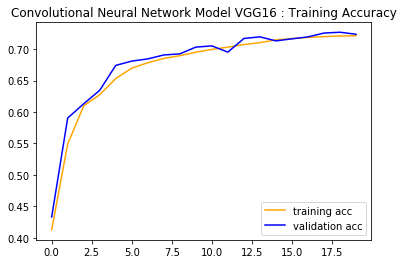

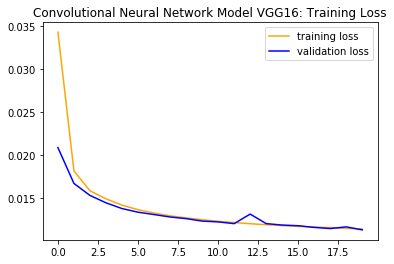

In [27]:
history = pd.DataFrame.from_dict(result_auto.history)


acc = history['accuracy']
val_acc = history['val_accuracy']
loss = history['loss']
val_loss = history['val_loss']
epochs = range(len(acc))
plt.plot(epochs, acc, '-', color='orange', label='training acc')
plt.plot(epochs, val_acc, '-', color='blue', label='validation acc')
plt.title('Convolutional Neural Network Model VGG16 : Training Accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, '-', color='orange', label='training loss')
plt.plot(epochs, val_loss,  '-', color='blue', label='validation loss')
plt.title('Convolutional Neural Network Model VGG16: Training Loss')
plt.legend()
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


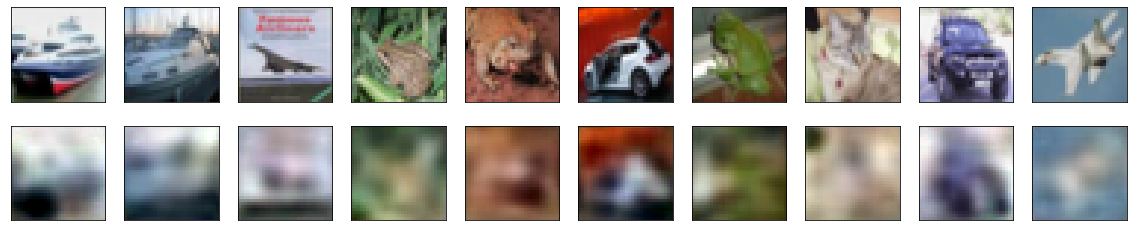

In [28]:
new = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))

# original
for i in range(1, n + 1):
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

   
    ax = plt.subplot(2, n, i + n)#predict
    plt.imshow(new[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
